## Abstract Sapientino with Restraining Bolts.

Level of abstraction "zero", with restraining bolts.

The goal is to visit N colors in a certain order.

In [1]:
%matplotlib inline

from multinav.helpers.gym import rollout
from multinav.algorithms.value_iteration import value_iteration
from multinav.helpers.temprl import MyTemporalGoalWrapper

import random
from multinav.envs.abstract_sapientino import AbstractSapientino, AbstractSapientinoTemporalGoal
from multinav.helpers.notebooks import print_env, print_automaton
from multinav.restraining_bolts.rb_abstract_sapientino import AbstractSapientinoRB

pygame 2.0.0.dev12 (SDL 2.0.12, python 3.7.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
formula = AbstractSapientinoRB(nb_colors=3).make_goal()
formula

'<(!red & !green & !blue)*;red;(!red & !green & !blue)*;green;(!red & !green & !blue)*;blue>tt'

In [3]:
nb_colors = 3
tg = AbstractSapientinoRB(nb_colors).make_sapientino_goal()
env = AbstractSapientino(nb_colors, failure_probability=0.0)
print("Before temporal goal wrapper:")
print(f"Observation space: {env.observation_space}")
print(f"Action space: {env.action_space}")
env = MyTemporalGoalWrapper(env, [tg])
print("After temporal goal wrapper:")
print(f"Observation space: {env.observation_space}")
print(f"Action space: {env.action_space}")

Before temporal goal wrapper:
Observation space: Discrete(4)
Action space: Discrete(5)
After temporal goal wrapper:
Observation space: Tuple(Discrete(4), MultiDiscrete([6]))
Action space: Discrete(5)


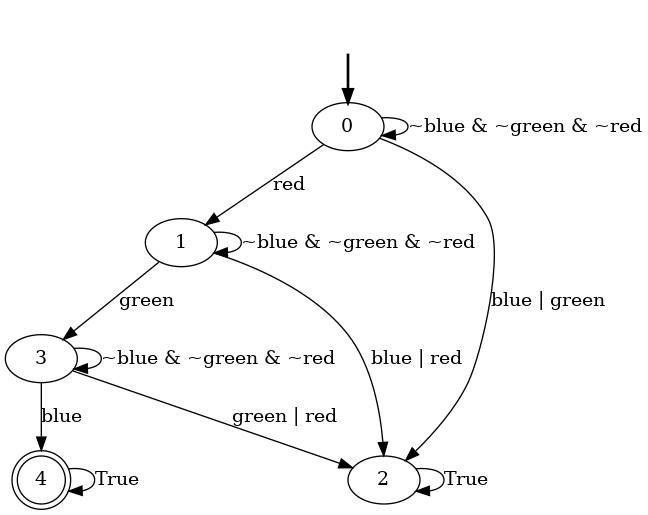

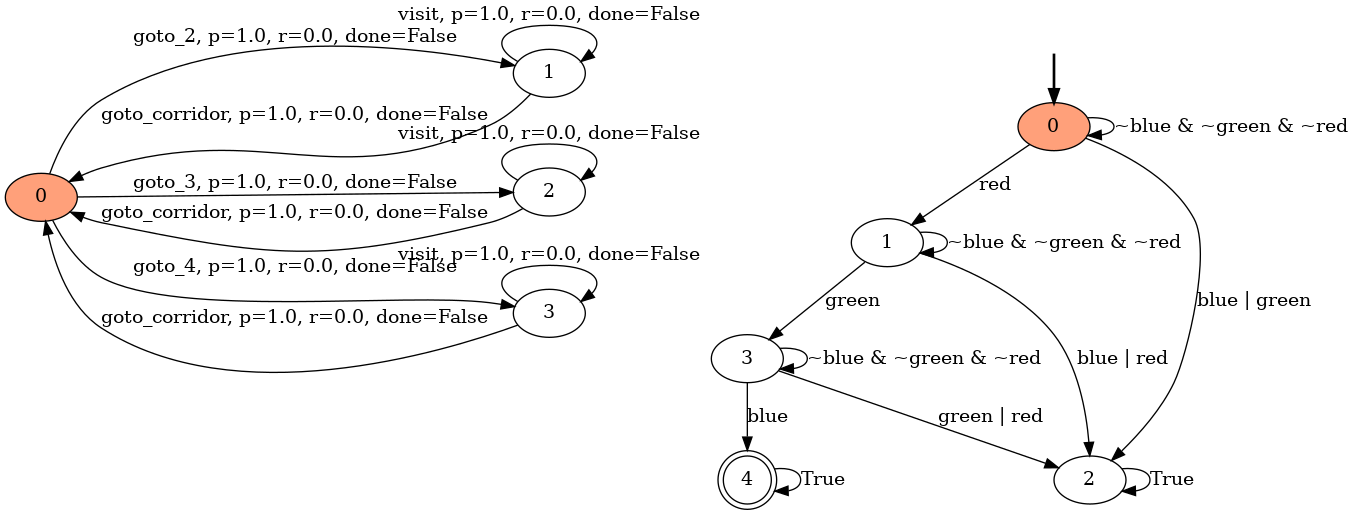

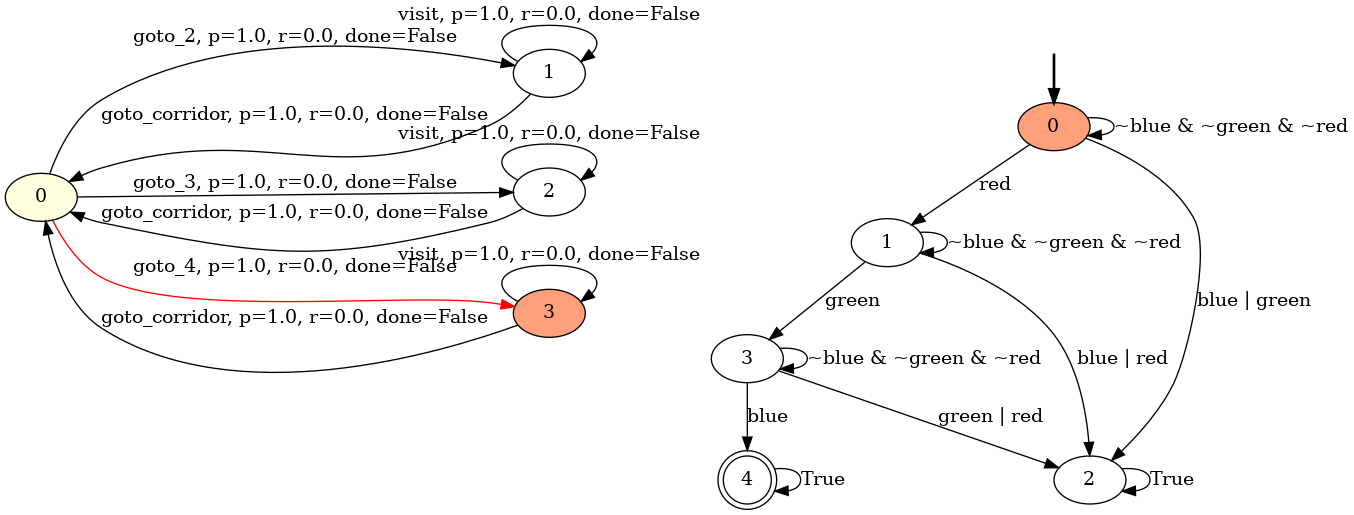

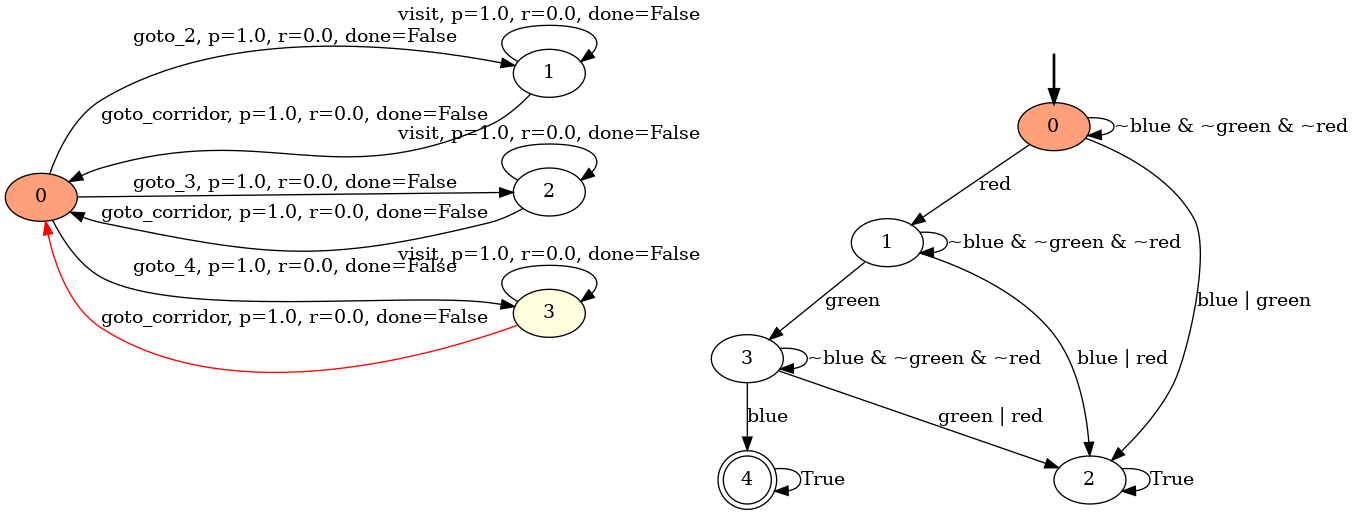

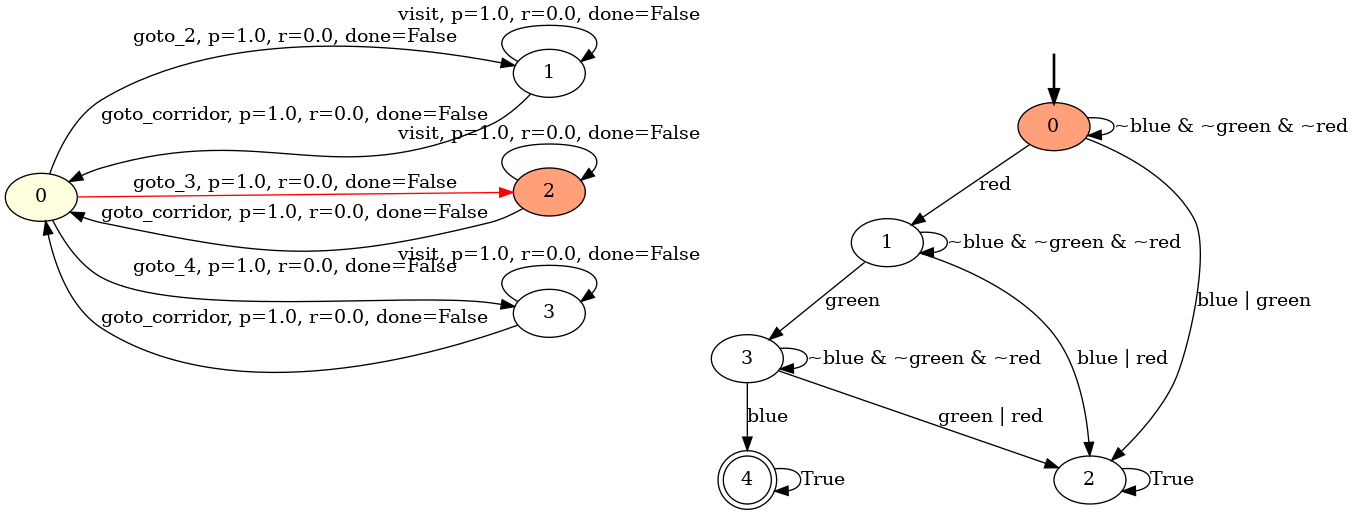

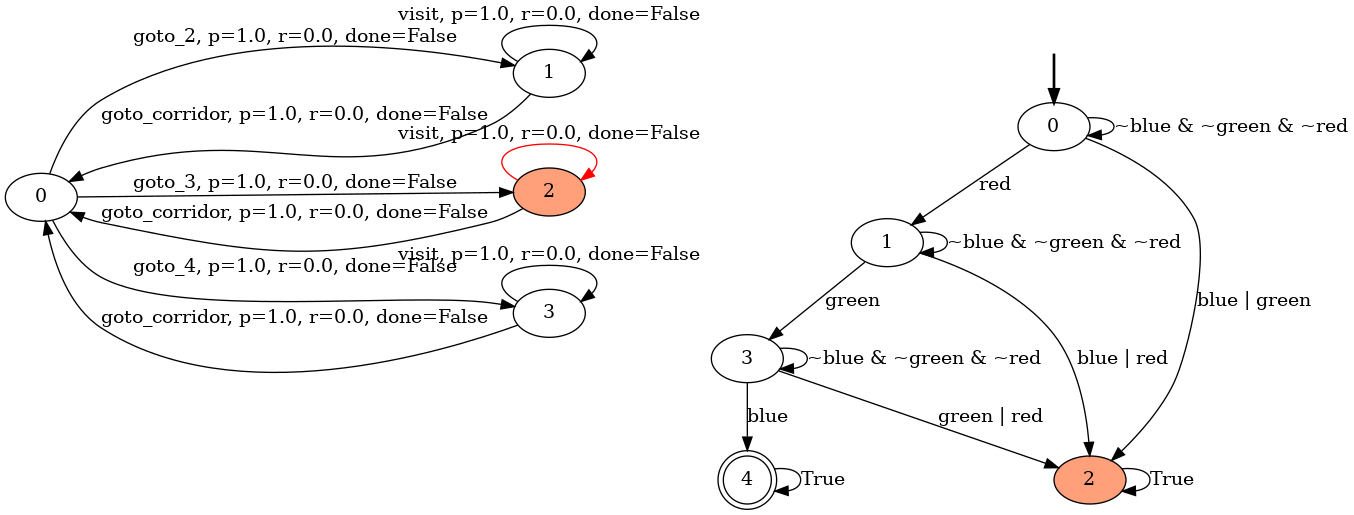

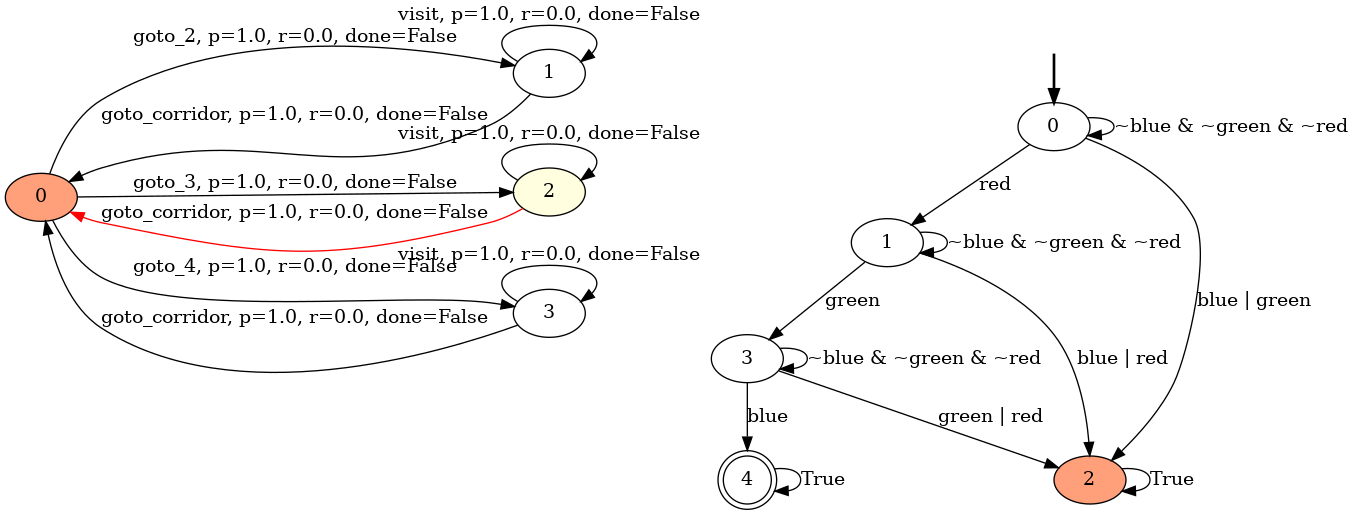

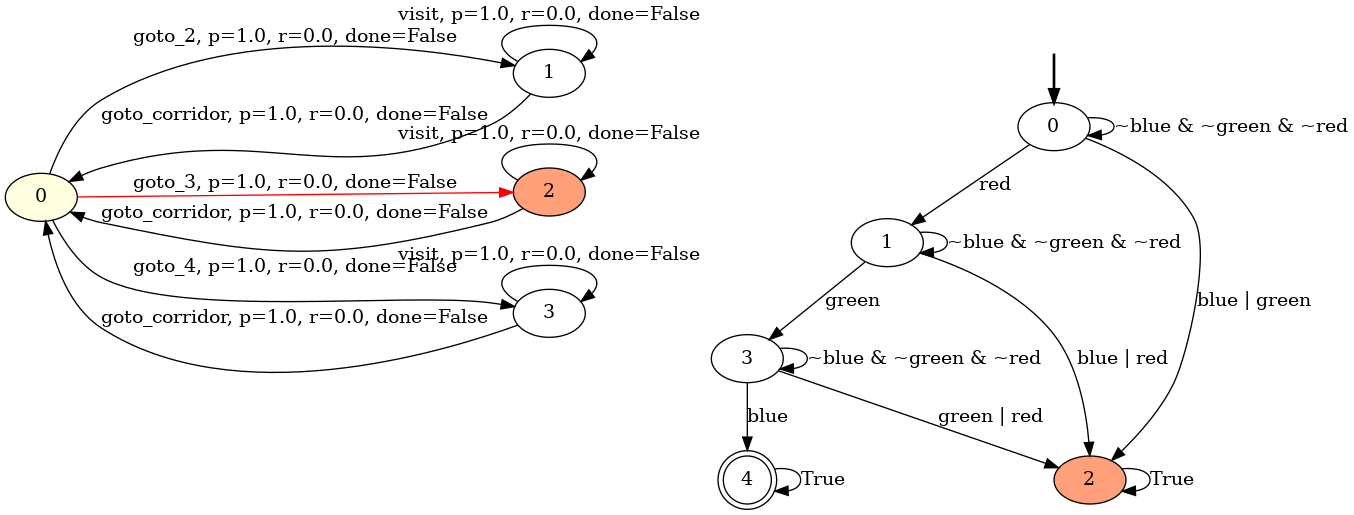

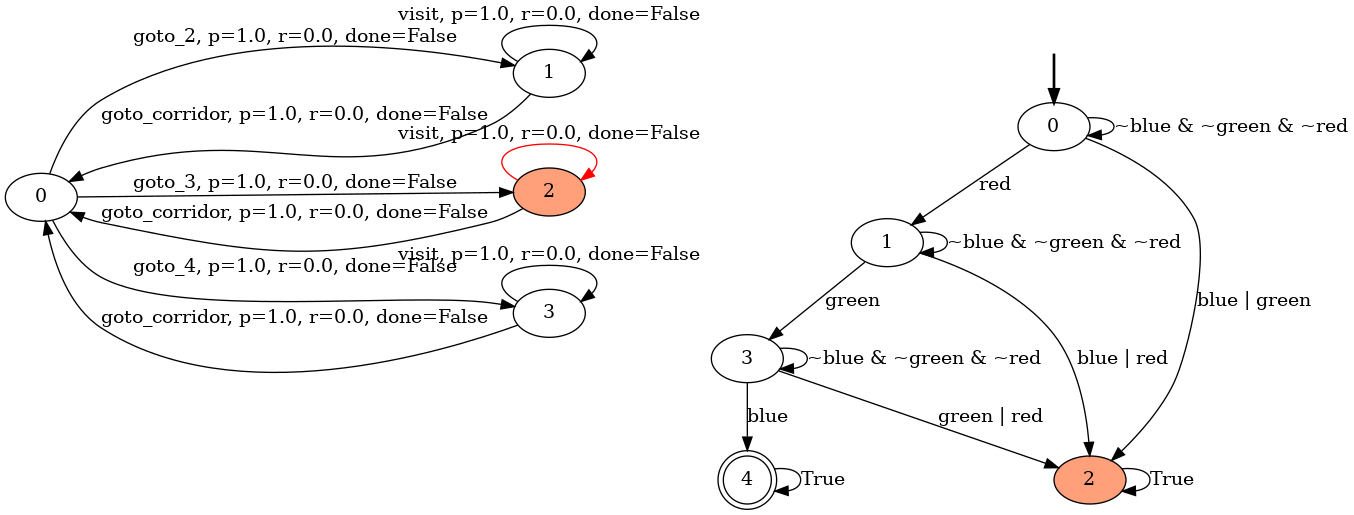

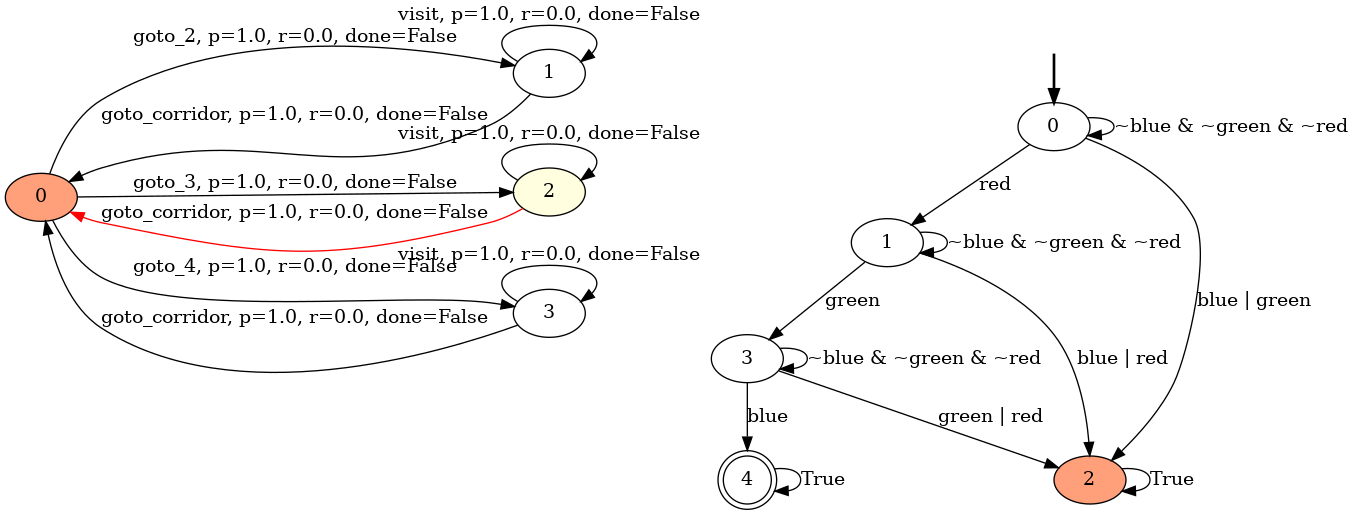

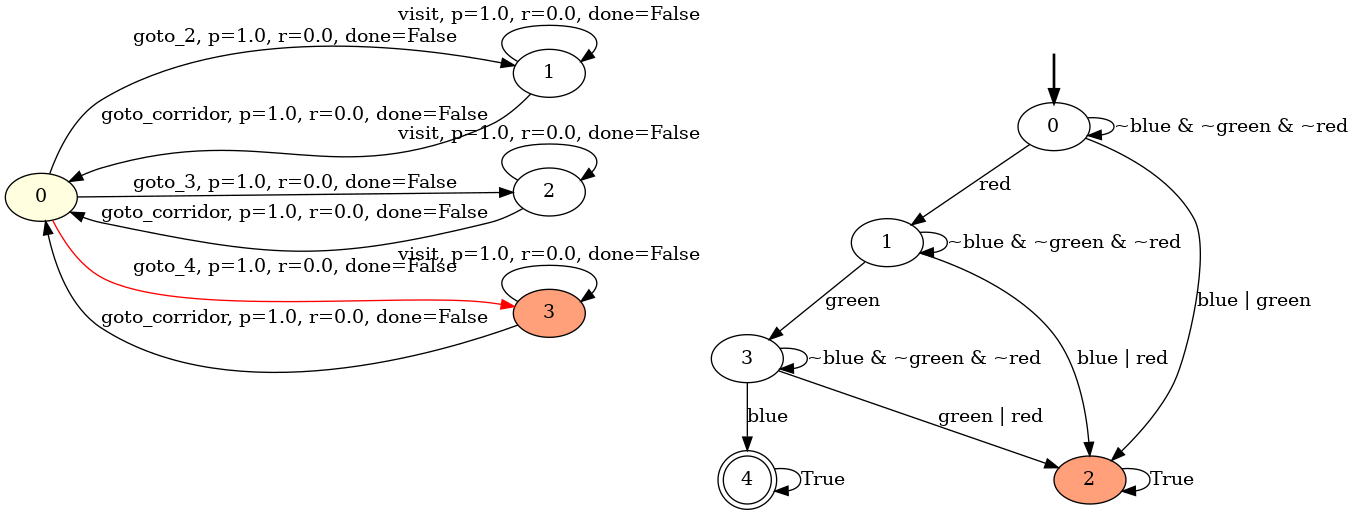

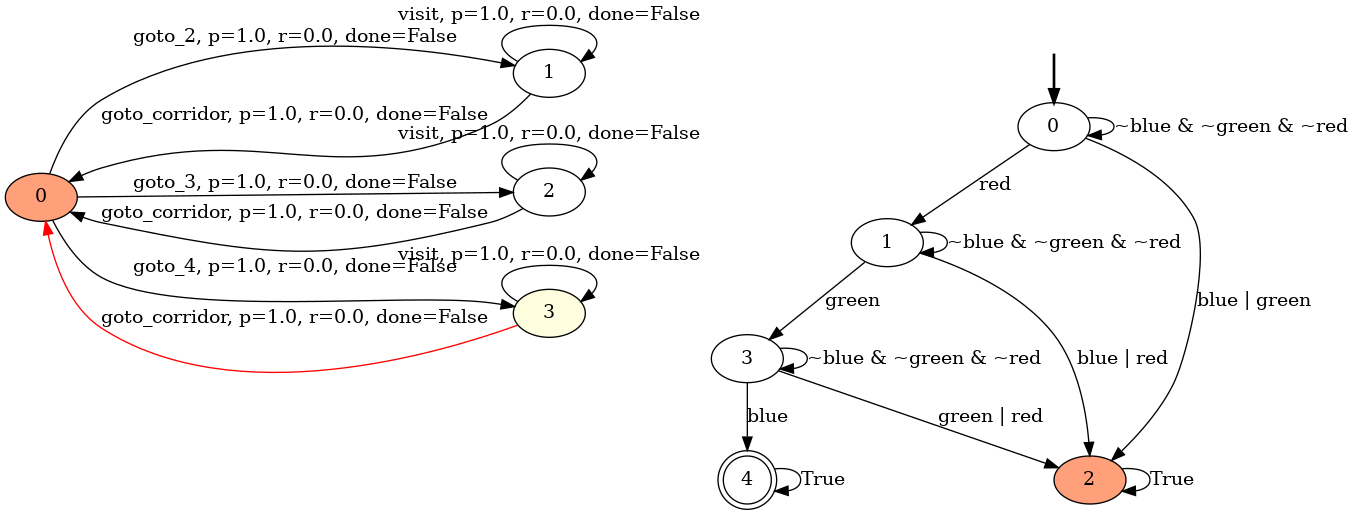

In [4]:
print_automaton(tg.automaton)

state = env.reset()
print_env(env)
for _ in range(10):
    action = random.choice(list(env.available_actions(state[0])))
    state, reward, done, info = env.step(action)
    print_env(env)

For value iteration, we need the enviornment with the full explicit model.

In [2]:
nb_colors = 3
rb = AbstractSapientinoRB(nb_colors)
env = AbstractSapientinoTemporalGoal(rb, [nb_colors], dict(failure_probability=0.0))

v, policy = value_iteration(env, discount=0.9, max_iterations=200)
print(f"Learned value function:")
for s,v in v.items():
    print(f"s={s}, v={v}")

Learned value function:
s=(0, 0), v=4.30467201155338
s=(0, 1), v=5.90489991155338
s=(0, 2), v=7.73948607802082e-14
s=(0, 3), v=8.09999991155338
s=(0, 4), v=9.999999911553381
s=(0, 5), v=0.0
s=(1, 0), v=4.78296891155338
s=(1, 1), v=5.314409911553379
s=(1, 2), v=7.73948607802082e-14
s=(1, 3), v=7.28999991155338
s=(1, 4), v=9.999999911553381
s=(1, 5), v=0.0
s=(2, 0), v=3.87420480155338
s=(2, 1), v=6.56099991155338
s=(2, 2), v=7.73948607802082e-14
s=(2, 3), v=7.28999991155338
s=(2, 4), v=9.999999911553381
s=(2, 5), v=0.0
s=(3, 0), v=3.87420480155338
s=(3, 1), v=5.314409911553379
s=(3, 2), v=7.73948607802082e-14
s=(3, 3), v=8.999999911553381
s=(3, 4), v=9.999999911553381
s=(3, 5), v=0.0


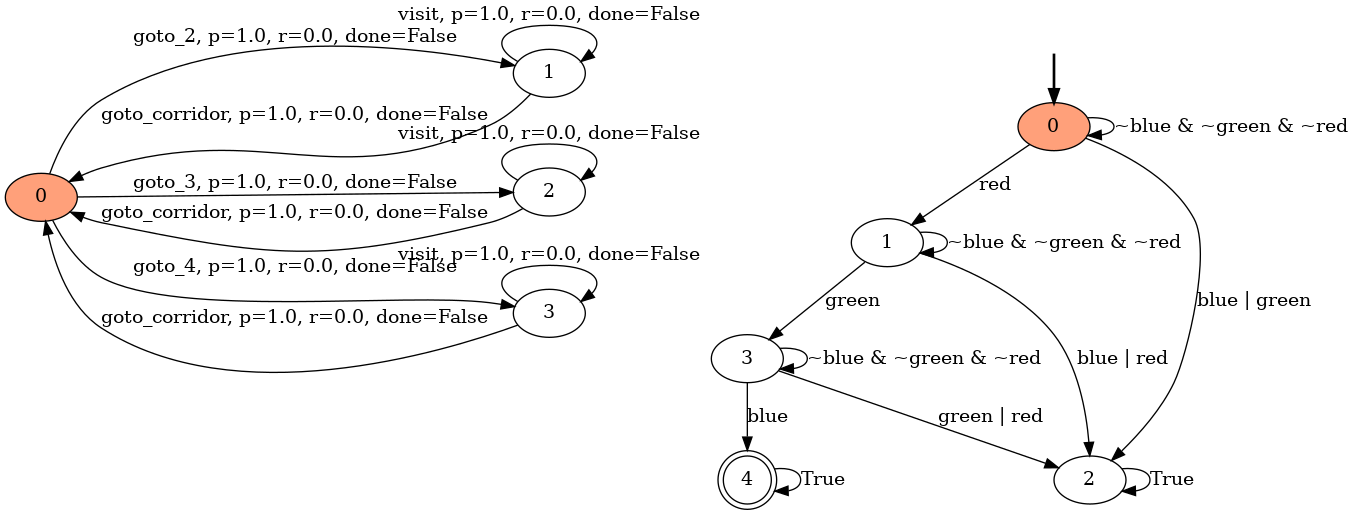

(1, 0) 0.0 False
(1, 1) 0.0 False
(0, 1) 0.0 False
(2, 1) 0.0 False
(2, 3) 0.0 False
(0, 3) 0.0 False
(3, 3) 0.0 False
(3, 4) 10.0 True


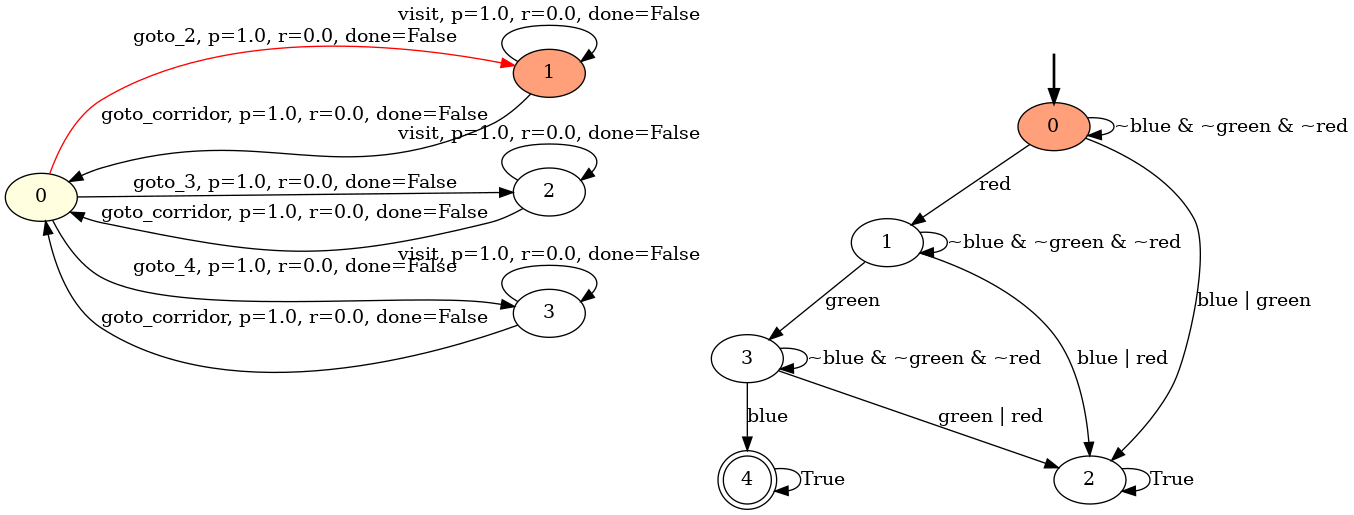

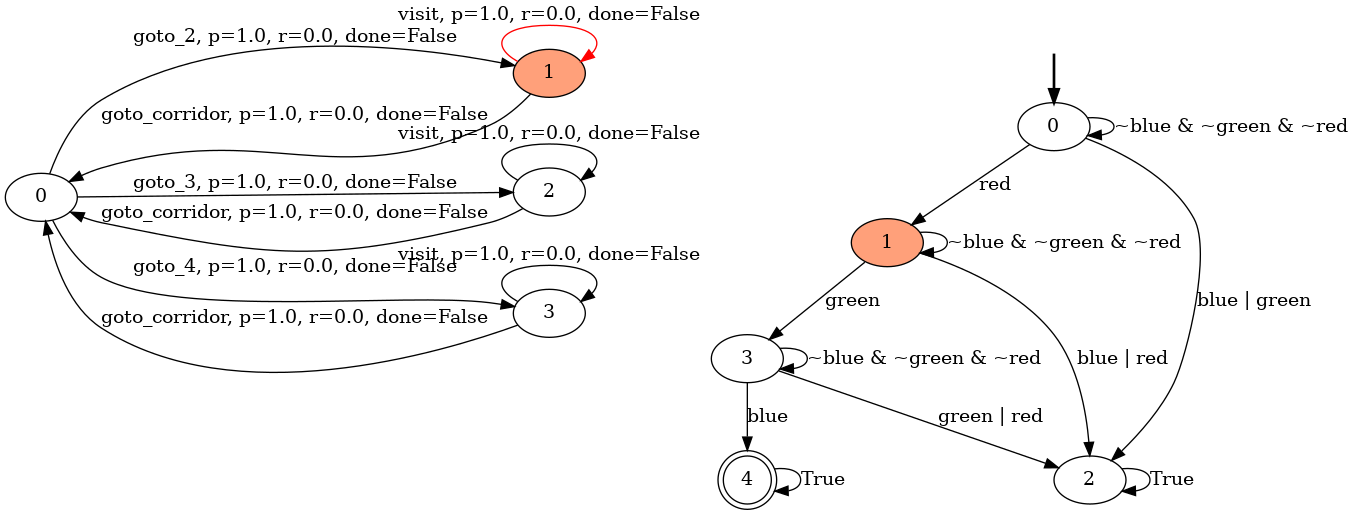

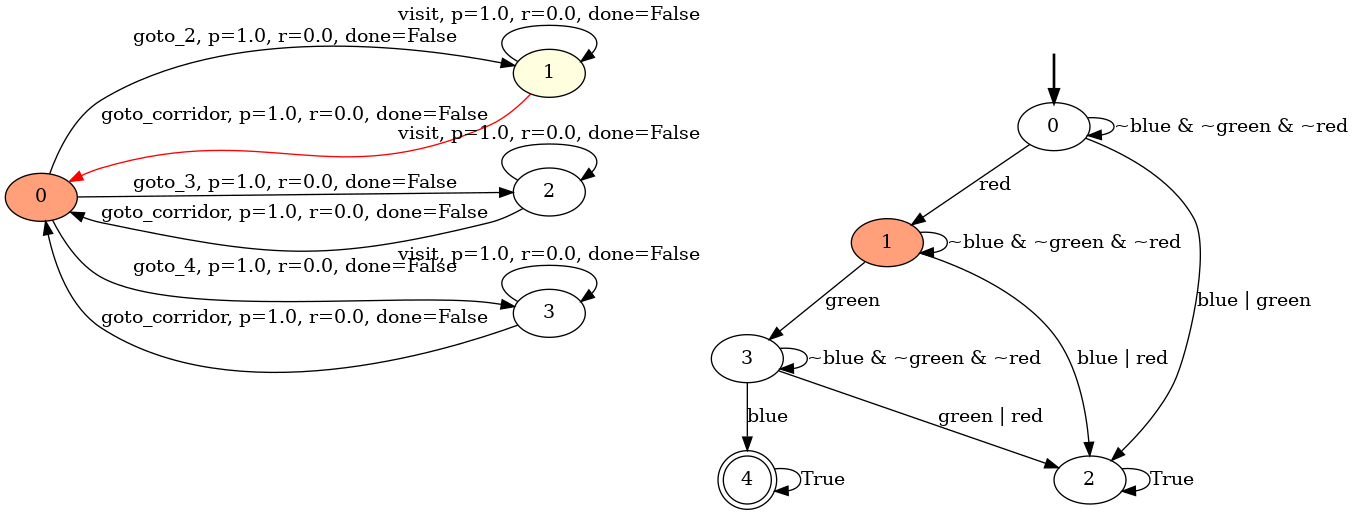

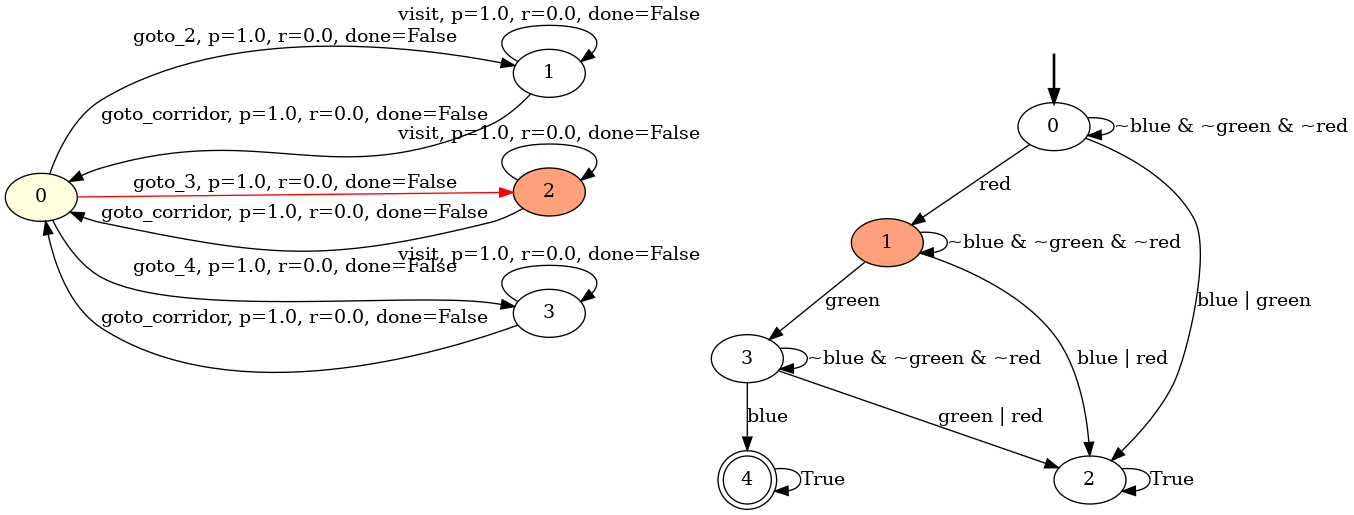

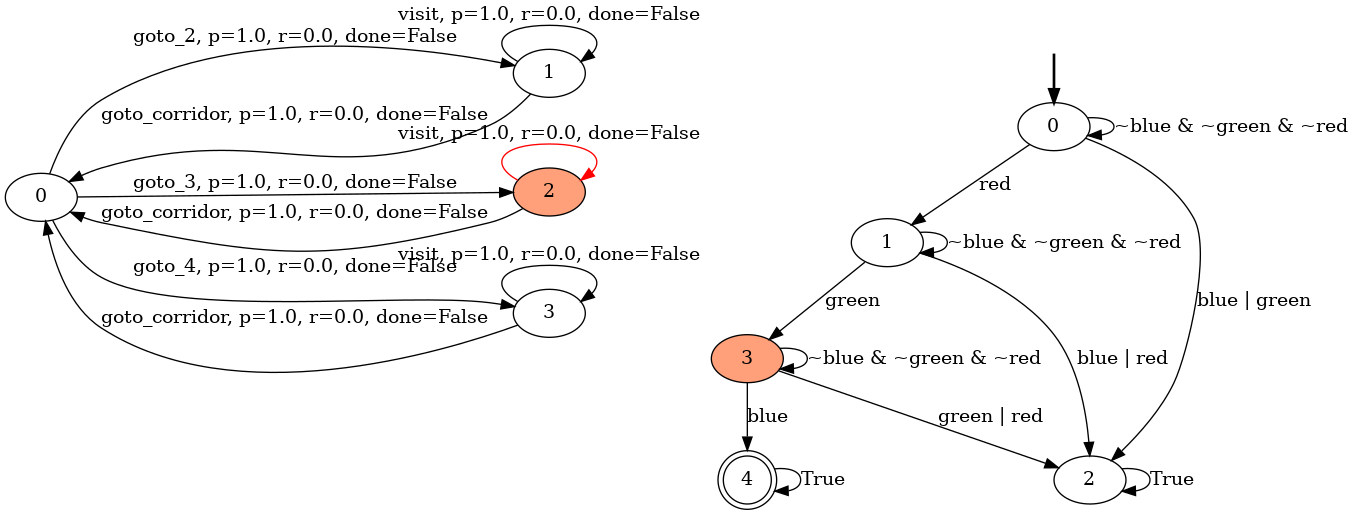

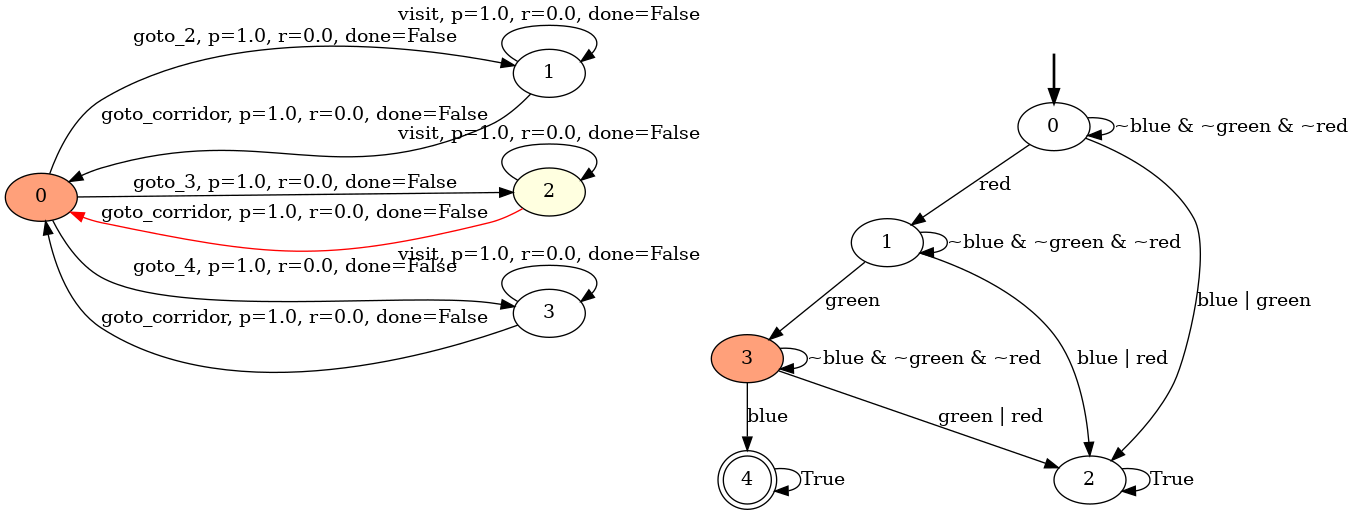

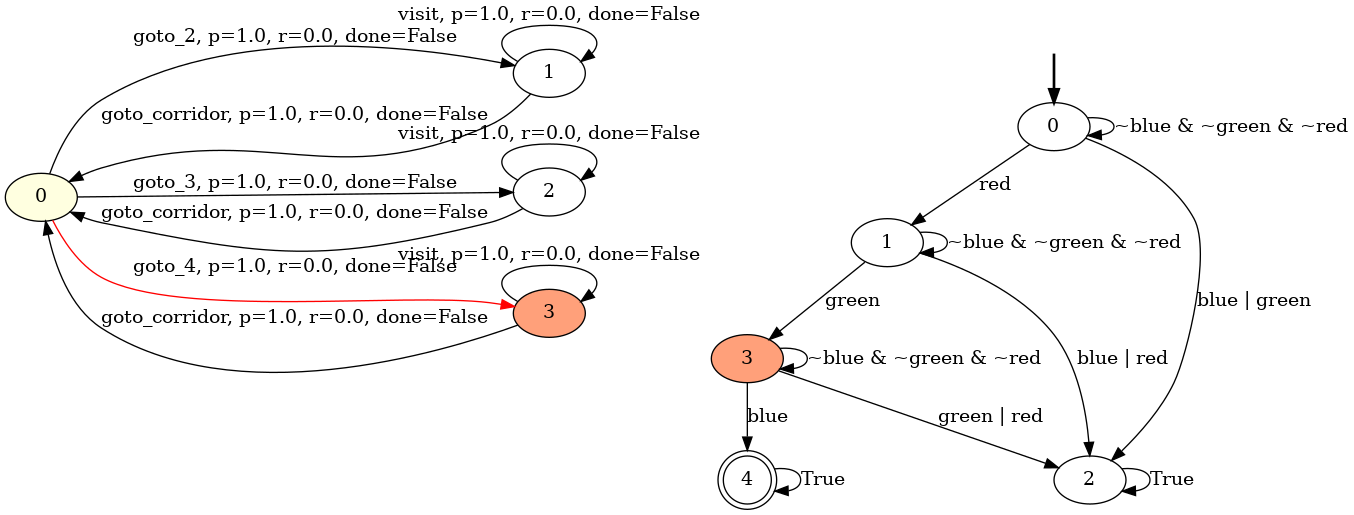

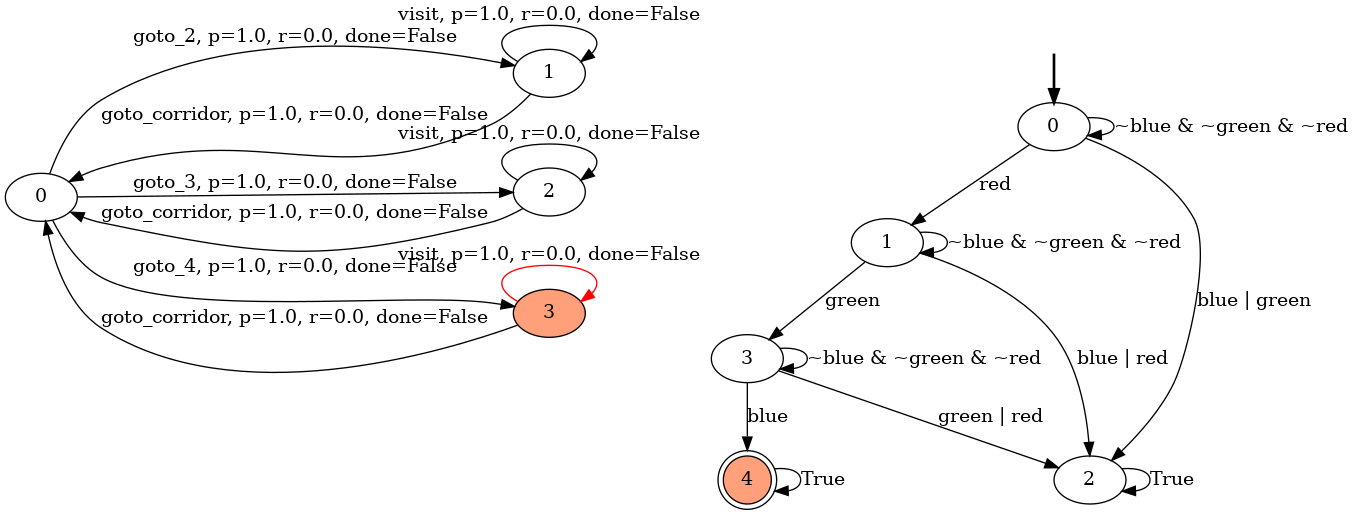

In [3]:
rollout(env, policy=lambda _env, _state: policy[_state], callback=print_env)